In [1]:
import numpy as np
import random
from imutils import paths 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import tensorflow
from PIL import Image
tensorflow.compat.v1.logging.set_verbosity((tensorflow.compat.v1.logging.ERROR)) #comment while debugging
from tensorflow.keras.applications import ResNet50V2, ResNet50, Xception #https://keras.io/api/applications/
from tensorflow.keras.layers import Input, GlobalMaxPooling2D,  Dropout , Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#!git clone https://github.com/farhansiddiqui/cnn-class.git

In [3]:
base_path = "."
#base_path = "/content/cnn-class"

In [4]:
img_height = 96
img_width = 96

baseModel = ResNet50V2(weights='imagenet', include_top=False,input_tensor=Input(shape=(img_height, img_width, 3)))
model = tensorflow.keras.Sequential([
    baseModel,
    GlobalMaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),    
    Dense(1, activation="sigmoid")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 3, 3, 2048)        23564800  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3

In [6]:
baseModel.trainable = False
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [7]:
image_size = (img_height, img_width)
batch_size = 64


trainAug = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=5,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest")

train_ds = trainAug.flow_from_directory(
    f"{base_path}/malaria/training",
    class_mode="binary",
    target_size=image_size,
    batch_size=batch_size)

valAug = ImageDataGenerator(rescale=1 / 255.0)

val_ds = valAug.flow_from_directory(
    f"{base_path}/malaria/validation",
    class_mode="binary",
    target_size=image_size,
    batch_size=batch_size)

test_ds = valAug.flow_from_directory(
    f"{base_path}/malaria/testing",
    class_mode="binary",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False)


Found 19842 images belonging to 2 classes.
Found 2204 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [8]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
epochs = 100
hist = model.fit( train_ds, epochs=epochs, validation_data=val_ds, callbacks = [es])

Epoch 1/100
311/311 [==============================] - 60s 193ms/step - loss: 0.5719 - accuracy: 0.7878 - val_loss: 0.3089 - val_accuracy: 0.8698
Epoch 2/100
311/311 [==============================] - 59s 189ms/step - loss: 0.3498 - accuracy: 0.8559 - val_loss: 0.2640 - val_accuracy: 0.8857
Epoch 3/100
311/311 [==============================] - 59s 189ms/step - loss: 0.3261 - accuracy: 0.8691 - val_loss: 0.2524 - val_accuracy: 0.8938
Epoch 4/100
311/311 [==============================] - 59s 189ms/step - loss: 0.3099 - accuracy: 0.8757 - val_loss: 0.2402 - val_accuracy: 0.8925
Epoch 5/100
311/311 [==============================] - 59s 190ms/step - loss: 0.2991 - accuracy: 0.8784 - val_loss: 0.2300 - val_accuracy: 0.8975
Epoch 6/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2964 - accuracy: 0.8809 - val_loss: 0.2273 - val_accuracy: 0.9025
Epoch 7/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2932 - accuracy: 0.8809 - val_loss: 0.2285 -

Epoch 57/100
311/311 [==============================] - 59s 190ms/step - loss: 0.2443 - accuracy: 0.9038 - val_loss: 0.2091 - val_accuracy: 0.9070
Epoch 58/100
311/311 [==============================] - 59s 191ms/step - loss: 0.2501 - accuracy: 0.9013 - val_loss: 0.1982 - val_accuracy: 0.9156
Epoch 59/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2501 - accuracy: 0.9037 - val_loss: 0.1962 - val_accuracy: 0.9129
Epoch 60/100
311/311 [==============================] - 59s 188ms/step - loss: 0.2382 - accuracy: 0.9046 - val_loss: 0.1963 - val_accuracy: 0.9133
Epoch 61/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2474 - accuracy: 0.9032 - val_loss: 0.1906 - val_accuracy: 0.9211
Epoch 62/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2457 - accuracy: 0.9031 - val_loss: 0.2020 - val_accuracy: 0.9156
Epoch 63/100
311/311 [==============================] - 59s 189ms/step - loss: 0.2420 - accuracy: 0.9032 - val_loss: 0

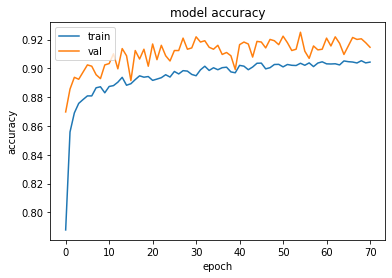

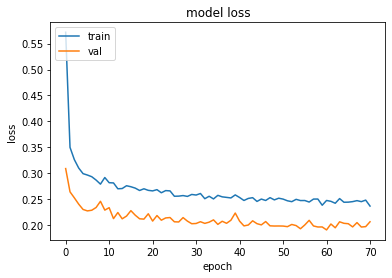

In [9]:

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
baseModel.trainable = True
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [11]:
hist2 = model.fit( train_ds, epochs=epochs, validation_data=val_ds, callbacks = [es])

Epoch 1/100
311/311 [==============================] - 60s 193ms/step - loss: 0.9343 - accuracy: 0.8124 - val_loss: 0.3435 - val_accuracy: 0.8929
Epoch 2/100
311/311 [==============================] - 59s 189ms/step - loss: 0.3543 - accuracy: 0.8750 - val_loss: 0.2405 - val_accuracy: 0.9052
Epoch 3/100
311/311 [==============================] - 59s 190ms/step - loss: 0.2666 - accuracy: 0.8991 - val_loss: 0.2058 - val_accuracy: 0.9238
Epoch 4/100
311/311 [==============================] - 59s 191ms/step - loss: 0.2348 - accuracy: 0.9163 - val_loss: 0.1792 - val_accuracy: 0.9365
Epoch 5/100
311/311 [==============================] - 59s 190ms/step - loss: 0.2092 - accuracy: 0.9262 - val_loss: 0.1632 - val_accuracy: 0.9401
Epoch 6/100
311/311 [==============================] - 60s 192ms/step - loss: 0.1921 - accuracy: 0.9337 - val_loss: 0.1475 - val_accuracy: 0.9478
Epoch 7/100
311/311 [==============================] - 59s 191ms/step - loss: 0.1804 - accuracy: 0.9392 - val_loss: 0.1365 -

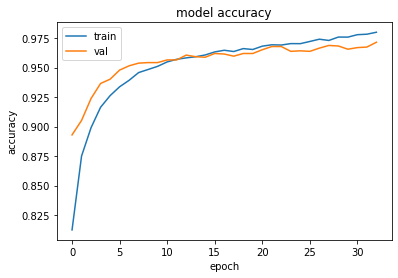

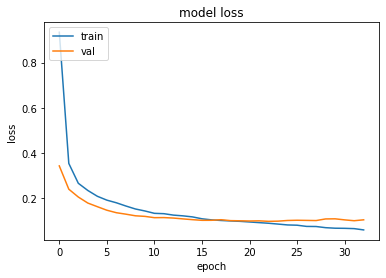

In [12]:
# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
imagePaths = list(paths.list_images(f'{base_path}/malaria/testing'))

C99P60ThinF_IMG_20150918_141001_cell_101.png


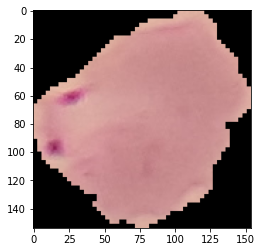

In [14]:
image = random.choice(imagePaths)
print(image.split('/')[-1].split('-')[0])
img = Image.open(image)
plt.imshow(img)

In [15]:
img = img.resize((img_height, img_width))
img_batch = np.expand_dims(np.asarray(img), axis=0)
prediction_class_idx = model.predict(img_batch)[0][0].round().astype('int32')
dict(map(reversed, test_ds.class_indices.items()))[prediction_class_idx]

'Parasitized'

In [16]:
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    title='Confusion Matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [17]:
test_ds.reset()
filenames = test_ds.filenames
nb_samples = len(filenames)

predictions = model.predict_generator(test_ds,steps = nb_samples)
predIdxs = predictions.round().astype('int32')

In [18]:
# predictions
 cm = tensorflow.math.confusion_matrix(labels=test_ds.labels, predictions=predIdxs).numpy()

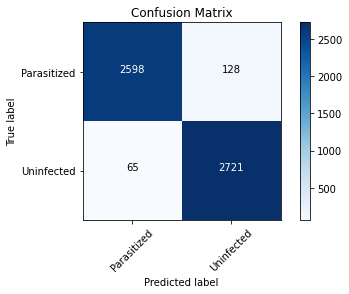

In [19]:
plot_confusion_matrix(cm, test_ds.class_indices)

In [20]:
#test accuracy 
round((test_ds.labels == predIdxs.flatten()).sum()/len(predictions),2)

0.96